# An Analysis of GoBike Data

## Overview
**This is an analysis of GoBike Data in the periods of Jan:Aug 2019 & Jan:Aug 2020. We chose these specific periods to inspect the impact of COVID-19 on the bussiness.** (Latest released data for 2020 was August, so we will work with 2019 data till August as well.)

This analysis is done to **highlight COVID-19 impact, to gain insights about users & to help the company target offers in certain stations.**

## Analysis approach

**Univariate relationships:**

- Number of rides per user type; who does the most rides?
- Explore most used bike_type.
- Explore start_weekday of trips.
- Explore start_hour of trips.
- Find top 10 stations (top-start & top-end) and the common stations between them to target offers to users visiting these places.

**Bivariate relationships:**

- Find most crowded stations at rush hours.
- Explore bike rides in 2019 and 2020 throughout the period of Jan:Aug, and see if COVID-19 affected the bussiness; number of rides.
- Compare rental_methods and user_types.
- Is there a relationship between trip hour-time and user_type?
- Explore the relationship between user_type, trip duration.

**Multivariate relationships:**
- Explore the relationship between start_weekday, trip_duration and user_type.

## The Data

**This data is provided according to the Bay Wheels License Agreement. Each trip is anonymized and includes:**

- Trip Duration (in seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
import os
import csv
from requests import get
from io import BytesIO
from zipfile import ZipFile

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_name(year, i):
        
    """
    
    As file names change every year and every month,    
    files from 1/2019 to 4/2019 have the name 'fordgobike'
    while the rest have the name 'baywheels'
    
    This loop will generate variate fileName.csv(s)
    to be used when downloading and extracting data
    
    """
    
    if (year == '2019' and i < 5):
            name = '{}0{}-fordgobike-tripdata.csv'.format(year, str(i))
            
    else:
            name = '{}0{}-baywheels-tripdata.csv'.format(year, str(i))
    
    return name

In [3]:
def get_data():
    
    """
    
    RUN ONCE TO DOWNLOAD DATA
    
    Download the data for the first time [1/2019 : 8/2019] & [1/2020 : 8/2020]
    
    """
    
    years = ['2019', '2020']
    
    # years 2019 & 2020
    for year in years: 
        
        # months from 1 to 8
        for i in range(1,9):
            
            name = get_name(year, i)
            url = 'https://s3.amazonaws.com/baywheels-data/{}.zip'.format(name)

            request = get(url, allow_redirects = True)
            zip_file = ZipFile(BytesIO(request.content))
            files = zip_file.namelist()

            zip_file.extractall('data')

In [4]:
# Uncomment to download the data for the first time [1/2019 : 8/2019] & [1/2020 : 8/2020]
#get_data()

In [5]:
def create_df_of_all_data():
    
    """
    
    RUN ONCE TO CREATE DATA (COMBINE CSVs)
    
    combine data [1/2019 : 8/2019] & [1/2020 : 8/2020] in one dataframe
    
    """
    
    # specifying columns
    # sorted to avoid mixing types.
    columns = sorted(['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name',
           'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name',
           'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
           'bike_share_for_all_trip', 'rental_access_method'])
    
    # declaring empty dataframe with these column names
    df = pd.DataFrame([], columns=columns)
    
    years = ['2019', '2020']
    
    # years 2019 & 2020
    for year in years: 
        
        # months from 1 to 8
        for i in range(1,9):
            # getting name
            name = get_name(year, i)
            
            # appending rows to df to contain all data 
            df = df.append(pd.read_csv('./data/' + name, low_memory=False), sort=True)
            
    df.to_csv(r'./data/2019_2020_BikeData_1_to_8.csv', index=False)

In [6]:
# Uncomment if running for the first time
# create_df_of_all_data()

In [7]:
# reading dataframe of all data
df = pd.read_csv('./data/2019_2020_BikeData_1_to_8.csv', low_memory=False)

In [8]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
0,4861.0,No,80825.0,NaN,NaN,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,...,NaN,NaN,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,NaN,Subscriber
1,5506.0,No,65900.0,NaN,NaN,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,...,NaN,NaN,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,NaN,Subscriber
2,2717.0,No,62633.0,NaN,NaN,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,...,NaN,NaN,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,NaN,Customer
3,4557.0,No,44680.0,NaN,NaN,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,...,NaN,NaN,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,NaN,Customer
4,2100.0,No,60709.0,NaN,NaN,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,...,NaN,NaN,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,NaN,Customer


In [9]:
df.shape

(3307800, 24)

**This dataset has 3307800 records (rows) and 25 attributes (cols).**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307800 entries, 0 to 3307799
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   bike_id                  float64
 1   bike_share_for_all_trip  object 
 2   duration_sec             float64
 3   end_lat                  float64
 4   end_lng                  float64
 5   end_station_id           object 
 6   end_station_latitude     float64
 7   end_station_longitude    float64
 8   end_station_name         object 
 9   end_time                 object 
 10  ended_at                 object 
 11  member_casual            object 
 12  rental_access_method     object 
 13  ride_id                  object 
 14  rideable_type            object 
 15  start_lat                float64
 16  start_lng                float64
 17  start_station_id         object 
 18  start_station_latitude   float64
 19  start_station_longitude  float64
 20  start_station_name       object 
 21  start_ti

**We won't use all of these columns, as some of them are irrelevant to our analysis, will only use:**

- 'start_station_name'
- 'end_station_name'
- 'rental_access_method'
- 'rideable_type'

- **'duration_sec':** will extract duration in minutes 
- **'start_time', 'started_at':** same info, will combine them (fill Nulls in one column with its value in the other because they changed the column name in some months), will also change the column's type to datetime to extract year, month, day and weekday.
- **'end_time', 'ended_at':** same info, will combine them (fill Nulls in one column with its value in the other), will also change the column's type to datetime.
- **'member_casual', 'user_type':** same info, will combine them (fill Nulls in one column with its value in the other) and encode member >> subscriber & casual >> customer.

## Data Wrangling

In [11]:
# Specifying columns that will be used
cols = ['start_station_name', 'end_station_name', 'rental_access_method',
        'rideable_type', 'duration_sec', 'start_time', 'started_at',
        'end_time', 'ended_at', 'member_casual', 'user_type']

In [12]:
data = df[cols].iloc[:]

In [13]:
data.head()

,start_station_name,end_station_name,rental_access_method,rideable_type,duration_sec,start_time,started_at,end_time,ended_at,member_casual,user_type
0,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,NaN,NaN,80825.0,2019-01-31 17:57:44.6130,NaN,2019-02-01 16:24:49.8640,NaN,NaN,Subscriber
1,Cyril Magnin St at Ellis St,Valencia St at 24th St,NaN,NaN,65900.0,2019-01-31 20:58:33.8860,NaN,2019-02-01 15:16:54.1730,NaN,NaN,Subscriber
2,Downtown Berkeley BART,65th St at Hollis St,NaN,NaN,62633.0,2019-01-31 18:06:52.9240,NaN,2019-02-01 11:30:46.5300,NaN,NaN,Customer
3,Church St at Duboce Ave,Grove St at Divisadero,NaN,NaN,44680.0,2019-01-31 19:46:09.7190,NaN,2019-02-01 08:10:50.3180,NaN,NaN,Customer
4,Steuart St at Market St,The Embarcadero at Bryant St,NaN,NaN,60709.0,2019-01-31 14:19:01.5410,NaN,2019-02-01 07:10:51.0650,NaN,NaN,Customer


In [14]:
data.shape

(3307800, 11)

**Now the dataset has 3307800 records (rows) and 11 attributes (cols).**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307800 entries, 0 to 3307799
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   start_station_name    object 
 1   end_station_name      object 
 2   rental_access_method  object 
 3   rideable_type         object 
 4   duration_sec          float64
 5   start_time            object 
 6   started_at            object 
 7   end_time              object 
 8   ended_at              object 
 9   member_casual         object 
 10  user_type             object 
dtypes: float64(1), object(10)
memory usage: 277.6+ MB


In [16]:
data.isna().sum()

start_station_name       784628
end_station_name         797919
rental_access_method    2598195
rideable_type           2618511
duration_sec             689289
start_time               689289
started_at              2618511
end_time                 689289
ended_at                2618511
member_casual           2618511
user_type                689289
dtype: int64

## Checking for duplicates

In [17]:
data.duplicated().sum()

7587

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

## Editing columns

1. Convert duration from seconds to minutes
2. Fill Nulls in 'start_time'  from their corresponding values in 'started_at'
3. Fill Nulls in 'end_time' from their corresponding values in 'ended_at'
4. Fill Nulls in 'user_type' from their corresponding values in 'member_casual', edit  member >> subscriber & casual >> customer
5. Drop not-needed columns
6. Extract duration in minutes from (end_time - start_time)
7. Extract year, month, day, hour, weekday from start_time

### 1. Convert duration from seconds to minutes

In [20]:
data["duration_min"] = data.duration_sec/60

### 2. Fill Nulls in 'start_time'  from their corresponding values in 'started_at'

In [21]:
data.start_time.fillna(data["started_at"], axis=0 ,inplace=True)

### 3. Fill Nulls in 'end_time' from their corresponding values in 'ended_at' 

In [22]:
data.end_time.fillna(data["ended_at"], axis=0 , inplace=True)

### 4. Fill Nulls in 'user_type' from their corresponding values in 'member_casual'

In [23]:
# fill NULLs
data.user_type.fillna(data["member_casual"], axis=0 , inplace=True)

# edit member >> subscriber
data.loc[data.user_type == "member","user_type"] = 'Subscriber'

# edit casual >> custome
data.loc[data.user_type == "casual", "user_type"] = "Customer"

### 5. Drop ['started_at',  'ended_at',  'member_casual', 'duration_sec']   because we no longer need them, we combined them with the other columns (same info)

In [24]:
to_drop = ['started_at', 'ended_at', 'member_casual', 'duration_sec']
data.drop(to_drop, axis=1, inplace=True)

In [25]:
data.isna().sum()

start_station_name       778235
end_station_name         791538
rental_access_method    2598164
rideable_type           2610955
start_time                    0
end_time                      0
user_type                     0
duration_min             689258
dtype: int64

**Minutes column has missing values, however, start_time & end_time don't, we can calculate those missing values by endtime - start_time in minutes.**

### 6. Extract duration in minutes from (end_time - start_time)


In [26]:
# first, we make start_time & end_time columns of type datetime

data["start_time"] = pd.to_datetime(data.start_time)
data["end_time"] = pd.to_datetime(data.end_time)

In [27]:
# calculate trip duration
data['duration_min'] = (data['end_time'] - data['start_time']).dt.total_seconds()/60

In [28]:
data.isna().sum()

start_station_name       778235
end_station_name         791538
rental_access_method    2598164
rideable_type           2610955
start_time                    0
end_time                      0
user_type                     0
duration_min                  0
dtype: int64

### 7.1. Extract year

In [29]:
data['start_year'] = data['start_time'].dt.year

###  7.2. Extract month

In [94]:
data["start_month"] =  data.start_time.dt.month

### 7.3. Extract day


In [31]:
data['start_day'] = data['start_time'].dt.day

### 7.4. Extract start hour


In [32]:
data['start_hour'] = data['start_time'].dt.hour

### 7.5. Extract start weekday

In [33]:
data['start_weekday'] = pd.Series(data.start_time).dt.day_name()

### Check data


In [34]:
data.head()

,start_station_name,end_station_name,rental_access_method,rideable_type,start_time,end_time,user_type,duration_min,start_year,start_month,start_day,start_hour,start_weekday
0,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,NaN,NaN,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Subscriber,1347.087517,2019,2019,31,17,Thursday
1,Cyril Magnin St at Ellis St,Valencia St at 24th St,NaN,NaN,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,Subscriber,1098.338117,2019,2019,31,20,Thursday
2,Downtown Berkeley BART,65th St at Hollis St,NaN,NaN,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,Customer,1043.893433,2019,2019,31,18,Thursday
3,Church St at Duboce Ave,Grove St at Divisadero,NaN,NaN,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,Customer,744.676650,2019,2019,31,19,Thursday
4,Steuart St at Market St,The Embarcadero at Bryant St,NaN,NaN,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,Customer,1011.825400,2019,2019,31,14,Thursday


In [35]:
data.isna().sum()

start_station_name       778235
end_station_name         791538
rental_access_method    2598164
rideable_type           2610955
start_time                    0
end_time                      0
user_type                     0
duration_min                  0
start_year                    0
start_month                   0
start_day                     0
start_hour                    0
start_weekday                 0
dtype: int64

**All good, no missing durations, we also got the year, month and day of each trip.**

**So, what if we dropped all rows with missing values?**

In [36]:
data.dropna().shape

(0, 13)

**WOW, we shouldn't do that!**


**Let's keep them and clean each column of [start_station_name, end_station_name, rental_access_method, rideable_type] (if needed) individually when doing analysis.**

In [37]:
data.describe()

,duration_min,start_year,start_month,start_day,start_hour
count,3.300213e+06,3.300213e+06,3.300213e+06,3.300213e+06,3.300213e+06
mean,1.776772e+01,2.019481e+03,2.019481e+03,1.594927e+01,1.376931e+01
std,4.746269e+02,4.996309e-01,4.996309e-01,8.829243e+00,4.719781e+00
min,-6.270000e+01,2.019000e+03,2.019000e+03,1.000000e+00,0.000000e+00
25%,6.153500e+00,2.019000e+03,2.019000e+03,8.000000e+00,9.000000e+00
50%,1.007530e+01,2.019000e+03,2.019000e+03,1.600000e+01,1.500000e+01
75%,1.626667e+01,2.020000e+03,2.020000e+03,2.400000e+01,1.700000e+01
max,2.890833e+05,2.020000e+03,2.020000e+03,3.100000e+01,2.300000e+01


## Exploratory Data Analysis

**Univariate relationships:**

- Number of rides per user type; who does the most rides?
- Explore most used bike_type.
- Explore start_weekday of trips.
- Explore start_hour of trips.
- Find top 10 stations (top-start & top-end) and the common stations between them to target offers to users visiting these places.

**Bivariate relationships:**

- Find most crowded stations at rush hours.
- Explore bike rides in 2019 and 2020 throughout the period of Jan:Aug, and see if COVID-19 affected the bussiness; number of rides.
- Compare rental_methods and user_types.
- Is there a relationship between trip hour-time and user_type?
- Explore the relationship between user_type, trip duration.

**Multivariate relationships:**
- Explore the relationship between start_weekday, trip_duration and user_type.

## Univariate relationships:

In [42]:
# to display one color when needed
base_color = sb.color_palette()[0]

### Number of rides per user type; who does the most rides?


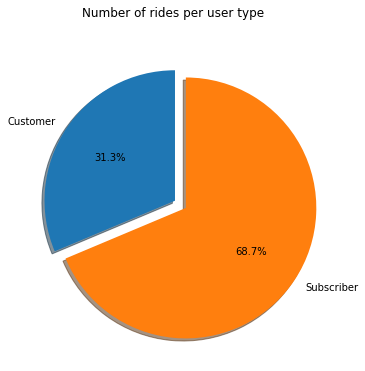

In [43]:
plt.figure(figsize= [15, 6])
o = data.groupby('user_type').user_type.count()
plt.pie(o,labels=o.index, autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90)
plt.title("Number of rides per user type \n");

**Subscribed users do the most rides.**

### Most used bike_type

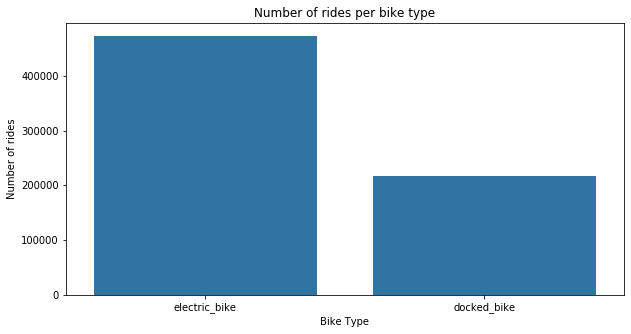

In [44]:
plt.figure(figsize= [10, 5])
sb.countplot(x='rideable_type', data=data, color=base_color);
plt.xlabel("Bike Type");
plt.ylabel("Number of rides");
plt.title("Number of rides per bike type");

**Most users prefer electric bike.**

### Explore start_hour of trips (find rush hours)

Text(0, 0.5, 'Number of rides\n')

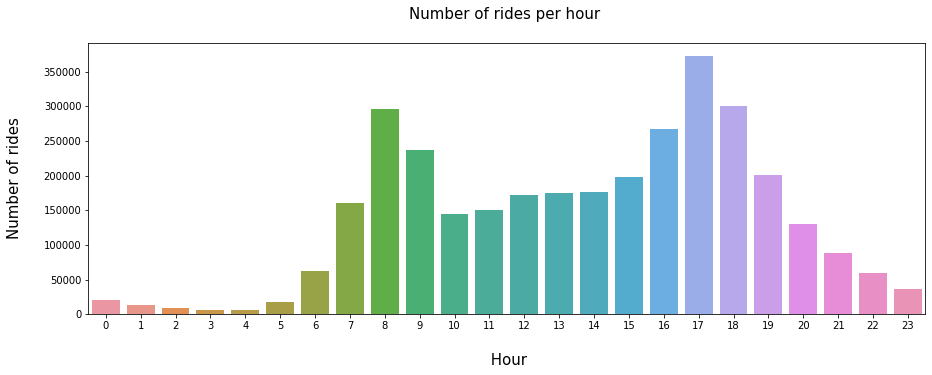

In [47]:
plt.figure(figsize = [15, 5])
sb.countplot(x="start_hour",data=data)
plt.title("Number of rides per hour \n",fontsize=15)
plt.xlabel("\n Hour",fontsize=15)
plt.ylabel("Number of rides\n",fontsize=15)

**We can see that hours with the most trips are (8 AM, 9 AM, 5 PM and 6 PM) which are working hours. Users might be using the bikes to get to and from work.**

## Some useful function we will use later:

In [60]:
def get_top_n_stations(typ, n):
    
    if typ=="start":
        return data["start_station_name"].value_counts()[:n]
    elif typ=="end":
        return data["end_station_name"].value_counts()[:n]
    else:
        return "Invalid station type !"

In [71]:
def get_common_stations(top_start, top_end):
    """
    Args:
    
        top_start: top start stations
        top_end: top end stations
        
    Returns:
        
        commons: common stations between top_start & top_end
        total_n_trips: total number of trips from/to station
    
    """
    # getting common stations between top_start & top_end
    # using .index to get station name.
    commons = top_start_stations[top_start_stations.index.isin(top_end_stations.index)].index.tolist()
    
    # adding n_trips from station + n_trips to station
    total_n_trips = top_start_stations[commons].values + top_end_stations[commons].values
    
    commons_df = pd.DataFrame({"station_name":commons, "total_n_trips":total_n_trips}).sort_values(by="total_n_trips",ascending=False)
    
    return commons_df

### Find top 10 stations (top-start & top-end) and the common stations between them to target offers to users visiting these places.

### Top Start Stations


In [72]:
n = 10 # top n stations

Text(0, 0.5, 'Station')

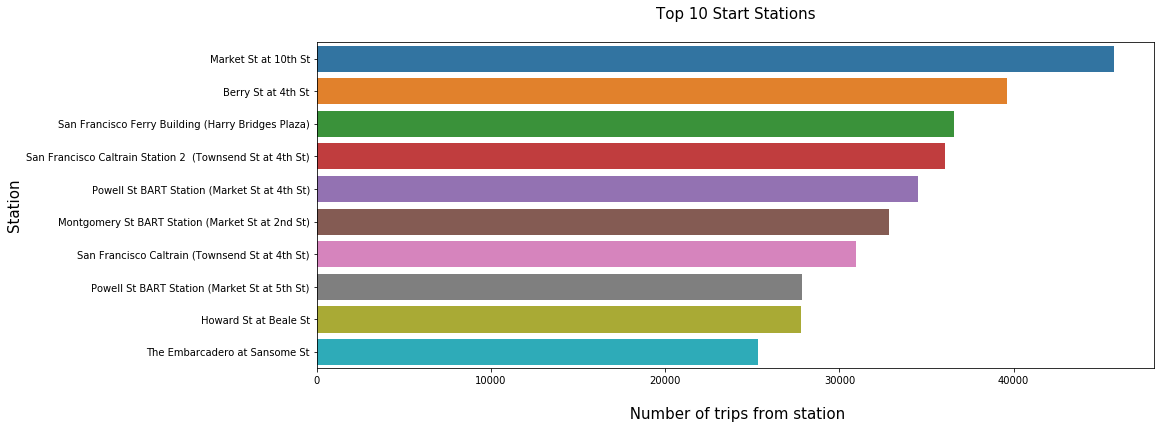

In [73]:
top_start_stations = get_top_n_stations('start', n)

plt.figure(figsize=(15,6))
sb.barplot(top_start_stations.values,y=top_start_stations.index)
plt.title("Top {} Start Stations\n".format(n), fontsize=15)
plt.xlabel("\n Number of trips from station", fontsize=15)
plt.ylabel("Station", fontsize=15)

Text(0, 0.5, 'Number of trips to station')

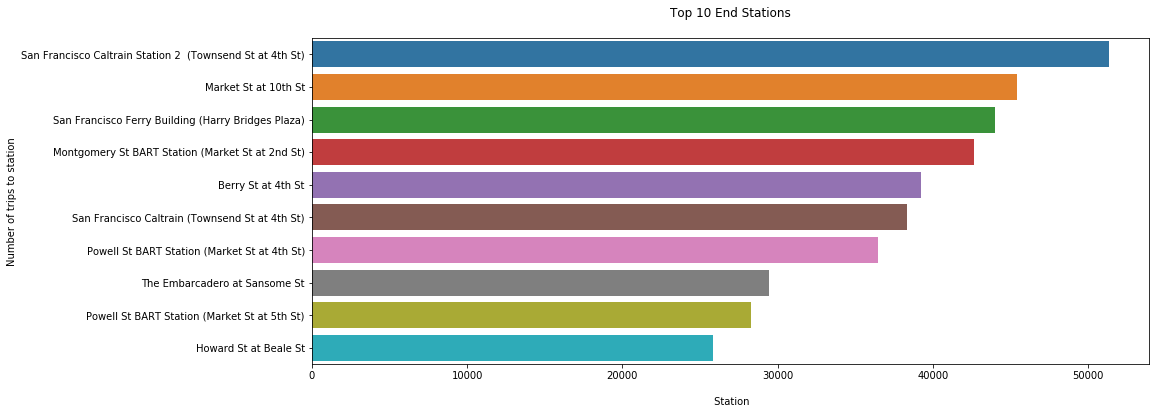

In [74]:
top_end_stations = get_top_n_stations('end', n)

plt.figure(figsize=(15,6))

sb.barplot(top_end_stations.values, y= top_end_stations.index)

plt.title("Top {} End Stations\n".format(n))
plt.xlabel("\n Station")
plt.ylabel("Number of trips to station")

### Common Stations between start&end stations

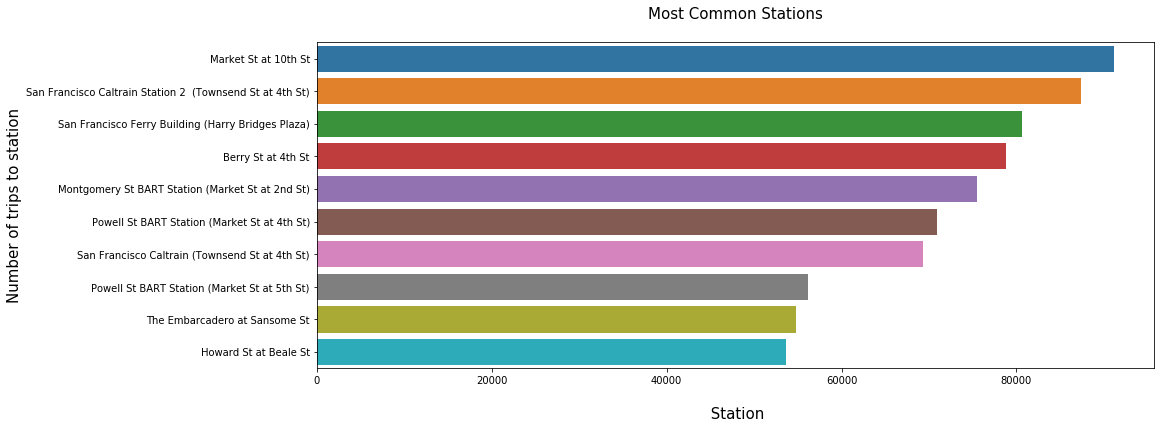

In [76]:
commons = get_common_stations(top_start_stations,top_end_stations)

plt.figure(figsize=(15,6))

sb.barplot(data = commons , x = "total_n_trips", y = "station_name")
plt.title("Most Common Stations\n", fontsize=15);
plt.xlabel("\n Station", fontsize=15);
plt.ylabel("Number of trips to station", fontsize=15);

### Top End Stations

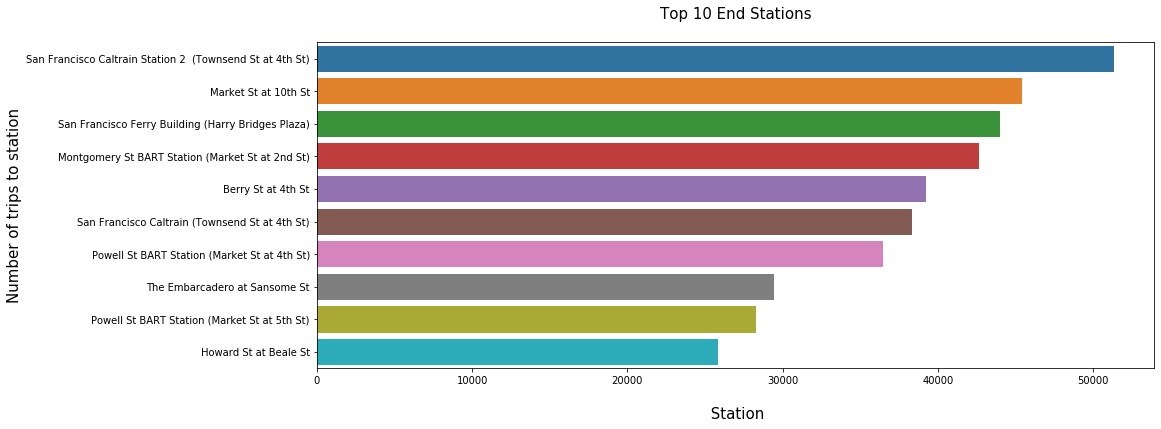

In [79]:
top_end_stations = get_top_n_stations("end",n)

plt.figure(figsize=(15,6))

sb.barplot(x=top_end_stations.values,y=top_end_stations.index)
plt.title("Top {} End Stations\n".format(n), fontsize=15);
plt.xlabel("\n Station", fontsize=15);
plt.ylabel("Number of trips to station", fontsize=15);

**As we noticed earlier, hours with the most trips are (8 AM, 9 AM, 5 PM and 6 PM) which are working hours, let's explore crowded stations..**

### Most crowded stations at rush hours:

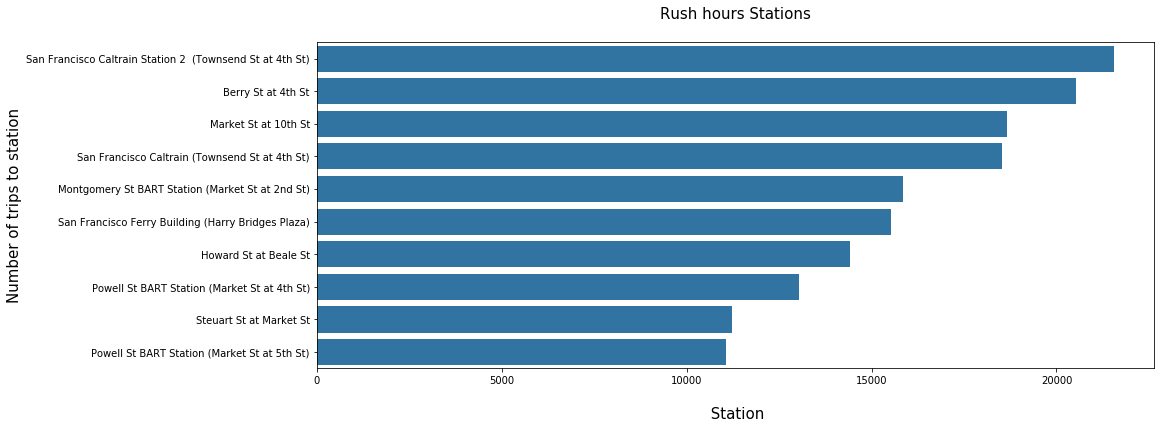

In [87]:
rush_hours_stations = data[data["start_hour"].isin([8,9,17,18])]["start_station_name"].value_counts()[:10]
plt.figure(figsize=(15,6))

sb.barplot(x= rush_hours_stations.values, y= rush_hours_stations.index, color= base_color);

plt.title("Rush hours Stations\n", fontsize=15);
plt.xlabel("\n Station", fontsize=15);
plt.ylabel("Number of trips to station", fontsize=15);

**We can attract users by providing offers to and from these stations.**

### Bivariate relationships:

### Inspect COVID-19 Effect

Let's compare the number of rides in 2019 and 2020

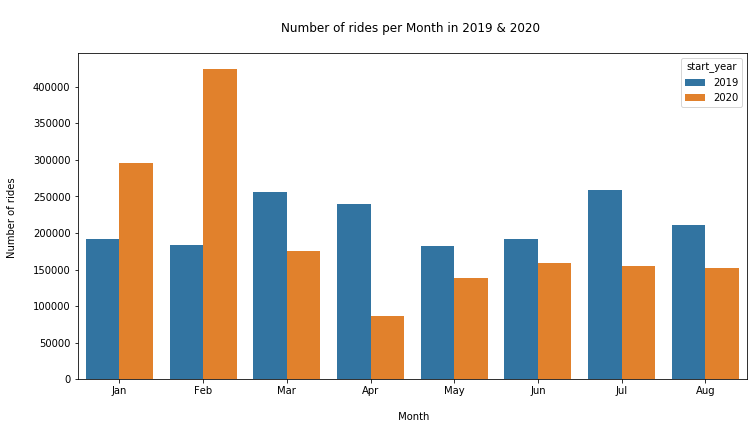

In [95]:
plt.figure(figsize = [12, 6])

sb.countplot(x='start_month', data=data, hue='start_year');
plt.xlabel("\n Month");
plt.ylabel("Number of rides \n");
plt.title("\nNumber of rides per Month in 2019 & 2020 \n");
plt.xticks(ticks=plt.xticks()[0], labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"));

**In 2020, bike rides numbers were at their highest, starting the year in Jan & Feb with higher number than those of 2019, however, we can notice that the number of rides had a surprising drop in March and kept dropping through April, the two months that had the most lockdowns and extreme measurements. The number of rides increased a bit at May, but comparing to 2019's numbers, COVID-19 affected the bike rides.**

#### Total number of rides in 2019 & 2020 (Univariate)

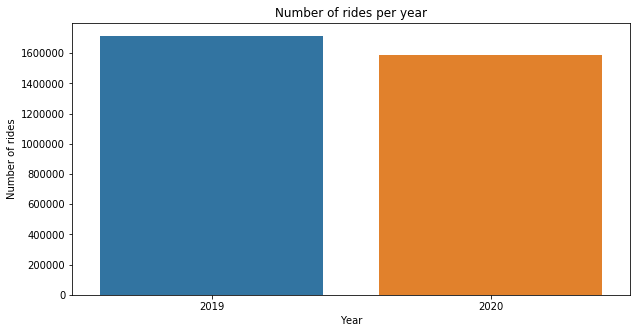

In [97]:
plt.figure(figsize= [10, 5])
sb.countplot(x='start_year', data=data);
plt.xlabel("Year");
plt.ylabel("Number of rides");
plt.title("Number of rides per year");

In [98]:
data.start_year.value_counts()[2019] - data.start_year.value_counts()[2020]

126795

**Apparently, COVID-19 has caused the bike rides to drop by 126795 in 2020 rides.**

### Compare rental_methods and user_types

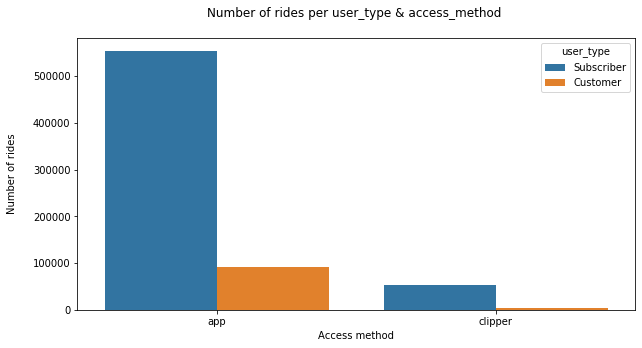

In [101]:
plt.figure(figsize= [10, 5])
sb.countplot(x="rental_access_method",data=data,hue="user_type")
plt.xlabel("Access method");
plt.ylabel("Number of rides\n");
plt.title("Number of rides per user_type & access_method \n");

**The app is the preferred access method for both Subscribers & Customers, as most rides were made through the app. We might consider sending offers through the app.**

### Is there a relationship between trip hour-time and user_type?

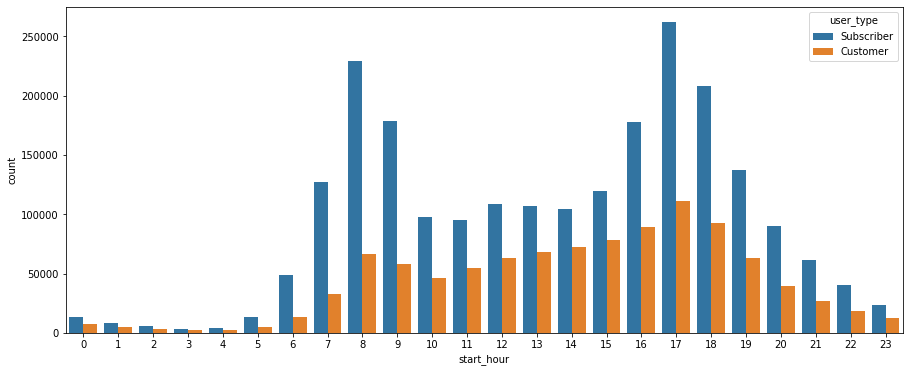

In [104]:
plt.figure(figsize= [15, 6])
sb.countplot(x="start_hour",data=data,hue="user_type")

**As we noticed earlier, most rides are done in begining and ending of working-hours (8 or 9 AM & 5 or 6 PM).**

**It doesn't seem to be a relationship between start_hour and user_type as both user types make rides at these times. However, most rides at these hours are done by subscribers, which strengthen the possibility that users use the bikes to get to and from work.**

**Providing offers at these hours can attract more users.**






### Explore the relationship between user_type & trip duration

**First, let's look at trip duration's distribution (all data)**

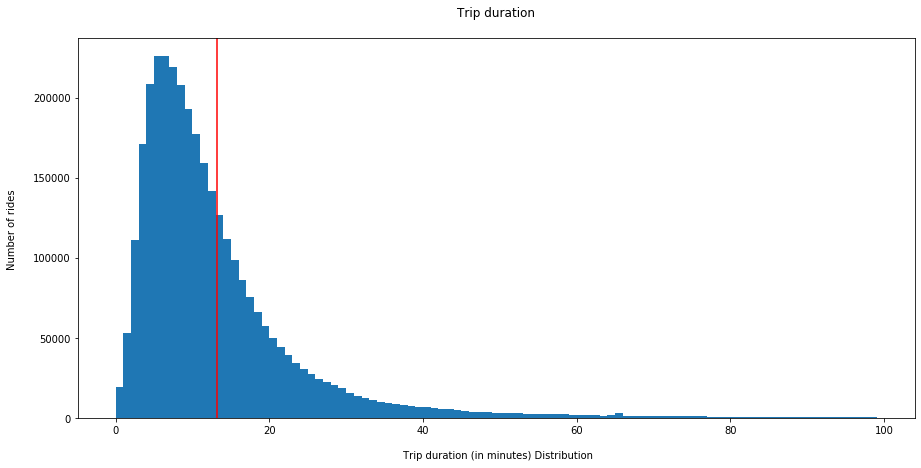

In [106]:
plt.figure(figsize= [15, 7])

binsize = 1
bins = np.arange(0, 100, binsize)

plt.hist(data[data['duration_min'] <= 100]['duration_min'], bins= bins);
plt.xlabel("\n Trip duration (in minutes) Distribution")
plt.ylabel("Number of rides \n")
plt.title("Trip duration\n");
plt.axvline(x=data[data['duration_min'] <= 100]['duration_min'].mean(), color='red');

**Trip duration follow a skewed-to-the-right normal distribution, with a mean of approximately 13.5, most rides are within the range of [0:20], although we removed durations > 100, there are some larger values (60/80, etc..)**

### First, let's look at trip duration's distribution

**Highlighting the two user types; Subscriber distribution in blue & Customer in orange**

**Subscribers' mean is in black, while Customers' mean in green**

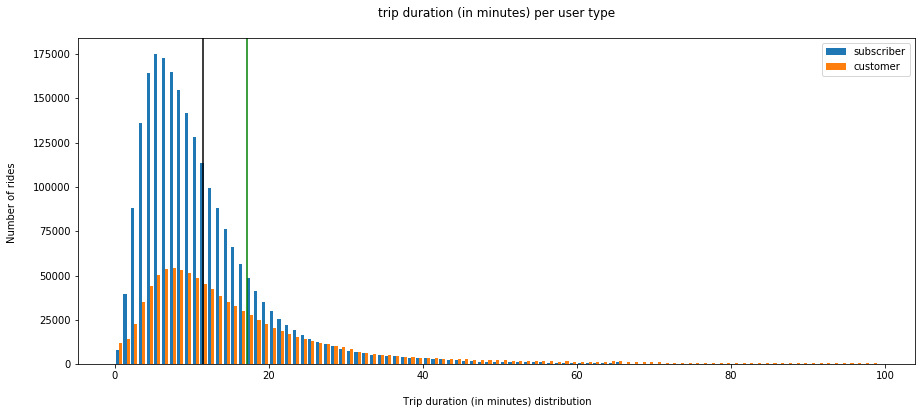

In [113]:
plt.figure(figsize=(15,6))

binsize=1
bins = np.arange(0,100,binsize)

subscribers = data.query('user_type == "Subscriber"')['duration_min']
customers = data.query('user_type == "Customer"')['duration_min']

plt.hist([subscribers, customers], bins= bins, label=['subscriber', 'customer']);
plt.xlabel("\n Trip duration (in minutes) distribution")
plt.ylabel("Number of rides \n")
plt.title("trip duration (in minutes) per user type\n");

mean_duration_subscriber = subscribers[subscribers <=100].mean()
plt.axvline(x=mean_duration_subscriber,color="black")

mean_duration_customer = customers[customers <=100].mean()
plt.axvline(x=mean_duration_customer, color="green")
plt.legend()

In [114]:
mean_duration_subscriber, mean_duration_customer

(11.479267344061467, 17.141217730080125)

**We can see that customers have higher average trip duration than subscribers.**

## Multivariate relationships

### Explore the relationship between start_weekday, trip_duration and user_type

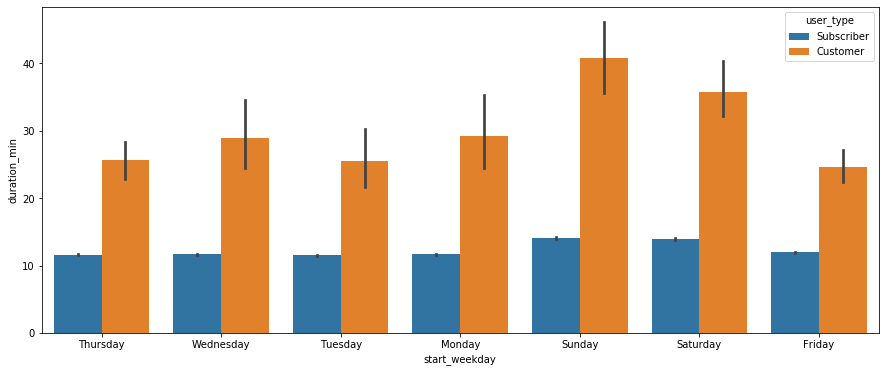

In [120]:
plt.figure(figsize= [15, 6])

sb.barplot(x='start_weekday', y='duration_min', data=data, hue='user_type');
plt.xlabel("weekday");
plt.ylabel("Trip duration");
plt.title("Trip Duration per weekday per user_type");

**The weekend (Saturday and Sunday) has the most trips, we can provide offers at thers days.**

**We can also see that customers have more trip durations than subscribers, we can offer them subscribtion plans or bundles.**

## Conclusion:

- Subscribed users do the most rides.
- Most users prefer electric bike.
- Rush hours are (8 AM, 9 AM, 5 PM and 6 PM) which are working hours, providing offers from/to crowded stations at these times can attract users.
- COVID-19 has caused the bike rides to drop by 127,993 in 2020 rides, the least number of rides was through the lockdown period (March:April 2020).
- The app is the preferred access method for both Subscribers & Customers, we might consider sending offers through the app.
- The weekend (Saturday and Sunday) has the most trips, we can provide offers at these days.
- Customers have more trip durations than subscribers, we can offer them subscription plans or bundles.